In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
def analysis_graph(G):

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)
    density = nx.density(G)
    print('density = ',density)

    if nx.is_connected(G) :
    
        diameter = nx.diameter(G)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G)
        print('average_shortest_path_length =',average_shortest_path_length )

    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_cc = G.subgraph(largest_cc)
        diameter = nx.diameter(G_cc)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G_cc)
        print('average_shortest_path_length =',average_shortest_path_length )


    avg_clustering = nx.average_clustering(G)
    print('avg_clustering = ',avg_clustering)
    transivity = nx.transitivity(G)
    print('transivity = ',transivity)
    assortativity = nx.degree_assortativity_coefficient(G)
    print('assortativity = ',assortativity)
    
    # calculate degree distribution
    degree_dist = sorted([d for n, d in G.degree()],reverse=True)
    sns.histplot(degree_dist);


    # calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    degree_list = np.array(list(degree_centrality.values())) #attention: degress are normalized(/n-1)
    degree_centralization = np.sum(max(degree_list)-degree_list) / (num_nodes-2)  # sum(Cmax-Ci)/(n-1)(n-2)
    
    # calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    betweenness_list = np.array(list(betweenness_centrality.values())) #attention: betweenness are normalized(/n-1)
    betweenness_centralization = np.sum(max(betweenness_list)-betweenness_list) / (num_nodes-1)

    # calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    closeness_list = np.array(list(closeness_centrality.values())) #attention: betweenness are normalized(/(n-1))*2
    closeness_centralization = (np.sum(max(closeness_list)-closeness_list) * 2) / (num_nodes-1)

    # precise version for closeness_centralization
    # denom = (num_nodes-1)*(num_nodes-2)/(1+2*(num_nodes-2)) # for big num_nodes == (num_nodes-1)/2
    # closeness_centralization = np.sum(max(closeness_list)-closeness_list) / denom


    # calculate PageRank centrality
    pagerank_centrality = nx.pagerank(G)
    pagerank_list = np.array(list(pagerank_centrality.values())) # sum(pagerank_list)=1
    pagerank_centralization = np.sum(max(pagerank_list)-pagerank_list) / (num_nodes-1)


    # print centralization metrics
    print('\n centralization metrics ')
    print('----------------------------')
    print('degree_centralization = ',degree_centralization)
    print('betweenness_centralization = ',betweenness_centralization)
    print('closeness_centralization = ',closeness_centralization)
    print('pagerank_centralization = ',pagerank_centralization)

Social circles: Facebook 

Value	Name
4039	# Nodes
88234	# Edges
43.69	Average degree
0.0108	Density
8	    Diameter
0.6055	Average Clustering coefficient
0.5192	Transitivity
3.6925	Average shortest path length
0.0636	Assortativity (Degree Correlation)
0.2481	Degree Centralization
0.4799	Betweenness Centralization
0.3672	Closeness Centralization
0.0074	PageRank Centralization


Watts_Strogatz graph

num_edges =  88858
num_nodes =  4039
average_degree =  44.0
density =  0.010896483407627538
diameter =  5
average_shortest_path_length = 3.1443664489160357
avg_clustering =  0.610206141246515
transivity =  0.6086879474332134
assortativity =  0.0014782070483861398

 centralization metrics 
----------------------------
degree_centralization =  0.0017343902728390432
betweenness_centralization =  0.0012862357553607832
closeness_centralization =  0.04282981165304653
pagerank_centralization =  3.473513188729265e-05


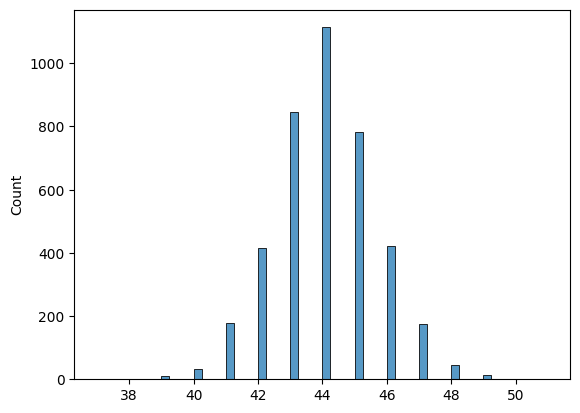

In [3]:
# watts_strogatz_graph(n, k, p, seed=None)
# n : The number of nodes
# k :Each node is connected to k nearest neighbors in ring topology
# p : The probability of rewiring each edge
n = 4039
average_deg = 43.69
# k : Each node is connected to k nearest neighbors in ring topology
# k is almost equal to average degree , because we remove some links and add instead of them , the same number random links
k = math.ceil(average_deg)
# fine-tuning the graph with p between 0.01 and 0.10 , we realized that the best fitting p is 0.06
p =  0.06
G1 = nx.watts_strogatz_graph(n, k, p, seed=1984)
analysis_graph(G1)

Barabasi_Albert graph

num_edges =  88374
num_nodes =  4039
average_degree =  43.76033671700916
density =  0.01083713143066101
diameter =  4
average_shortest_path_length = 2.515118138025475
avg_clustering =  0.03684230408884608
transivity =  0.03602738931777011
assortativity =  -0.003985216239472197

 centralization metrics 
----------------------------
degree_centralization =  0.09668969658200036
betweenness_centralization =  0.01813429725396616
closeness_centralization =  0.2568056706451783
pagerank_centralization =  0.0018769989251664779


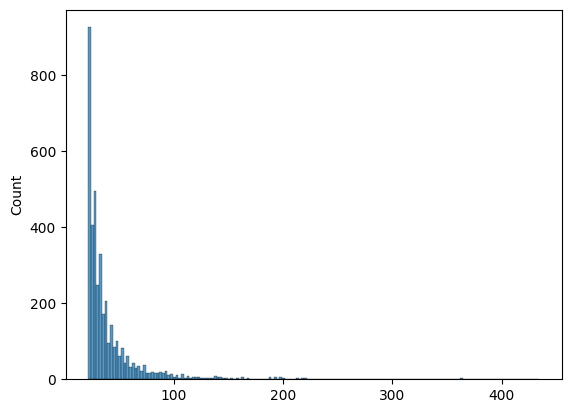

In [4]:
# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
# n : Number of nodes
# m : Number of edges to attach from a new node to existing nodes
n = 4039
average_deg = 43.69
m = math.ceil(average_deg/2)
G2 = nx.barabasi_albert_graph(n, m, seed=1984)
analysis_graph(G2)

Kronecker graph


 K.shape =  (4096, 4096)
num_edges =  110201
num_nodes =  4096
average_degree =  53.80908203125
density =  0.013140190972222222
diameter =  4
average_shortest_path_length = 3.319148375496032
avg_clustering =  0.2867827801296059
transivity =  0.24061585737854674
assortativity =  0.023777412564154242

 centralization metrics 
----------------------------
degree_centralization =  0.16520665460577524
betweenness_centralization =  0.11720201940666498
closeness_centralization =  0.48973096163763485
pagerank_centralization =  0.0028379711277116927


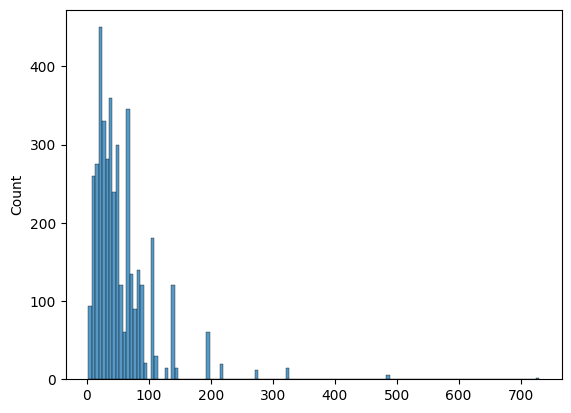

In [6]:
# k1 : Initiator of a Kronecker graphs, we find with fine-tuning different random initial matrix
# size of initiator K1
N1 = 4
# k1.shape : (N1,N1) 


k1 = [[1, 1, 0, 0],
      [1, 1, 1, 0],
      [0, 0, 0, 1],
      [0, 0, 0, 1]]

n = 4039
# m : number of Kronecker product steps
m = math.ceil(math.log(n)/math.log(N1))

K = k1
for i in range(m-1):
    K = np.kron(K, k1)

print('\n K.shape = ', K.shape)
G3 = nx.from_numpy_array(K)
analysis_graph(G3)


citation network

Value	Name
27770	# Nodes
352324	# Edges
25.374	Average degree
0.0009	Density
13	    Diameter
0.312	Average Clustering coefficient
0.1196	Transitivity
4.238	Average shortest path length
-0.03	Assortativity (Degree Correlation)
0.088	Degree Centralization
0.081	Betweenness Centralization
0.267	Closeness Centralization
0.002	PageRank Centralization



Watts_Strogatz graph

num_edges =  361010
num_nodes =  27770
average_degree =  26.0
density =  0.0009362958694947603
diameter =  5
average_shortest_path_length = 3.856043728111205
avg_clustering =  0.30642075697050575
transivity =  0.30201582026703827
assortativity =  -0.008015176108443156

 centralization metrics 
----------------------------
degree_centralization =  0.00036013973328276994
betweenness_centralization =  0.00021330348682227954
closeness_centralization =  0.019763038662761415
pagerank_centralization =  1.180723293587829e-05


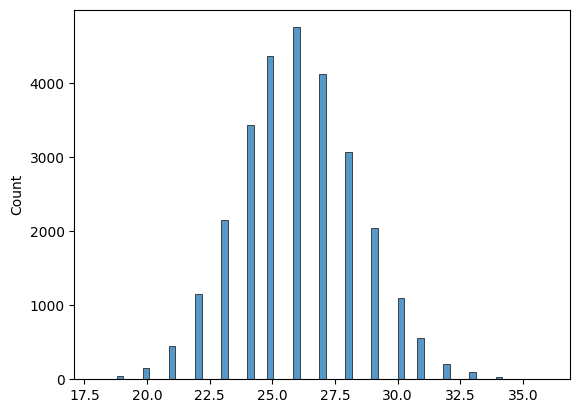

In [7]:
# watts_strogatz_graph(n, k, p, seed=None)
# n : The number of nodes
# k :Each node is connected to k nearest neighbors in ring topology
# p : The probability of rewiring each edge
n = 27770
average_deg = 25.374
# k : Each node is connected to k nearest neighbors in ring topology
# k is almost equal to average degree , because we remove some links and add instead of them , the same number random links
k = math.ceil(average_deg)
# fine-tuning the graph with p between 0.05 and 0.30 , we realized that the best fitting p is p = 0.25
p =  p =  0.25
G1 = nx.watts_strogatz_graph(n, k, p, seed=1984)
analysis_graph(G1)

Barabasi_Albert graph

num_edges =  360841
num_nodes =  27770
average_degree =  25.987828592005762
density =  0.0009358575603012626
diameter =  5
average_shortest_path_length = 3.112102218683531
avg_clustering =  0.005957828361618343
transivity =  0.005238279043110605
assortativity =  -0.011488790698112846

 centralization metrics 
----------------------------
degree_centralization =  0.034573852735908794
betweenness_centralization =  0.02768365414368384
closeness_centralization =  0.28485328793135867
pagerank_centralization =  0.001135517134621977


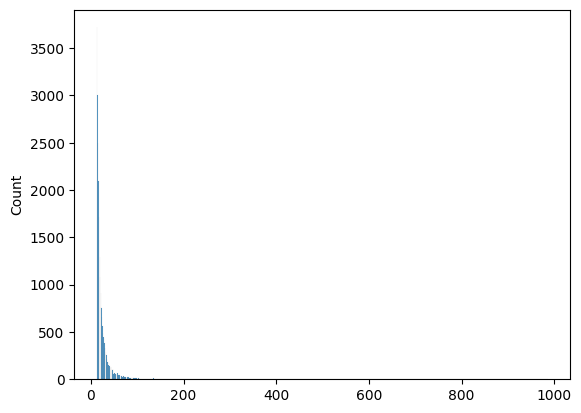

In [8]:
# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
# n : Number of nodes
# m : Number of edges to attach from a new node to existing nodes
n = 27770
average_deg = 25.374
m = math.ceil(average_deg/2)
G2 = nx.barabasi_albert_graph(n, m, seed=1984)
analysis_graph(G2)

Erdos_Renyi graph

num_edges =  351815
num_nodes =  27770
average_degree =  25.337774576881525
density =  0.0009124482184047508
diameter =  5
average_shortest_path_length = 3.5264509548286975
avg_clustering =  0.0009261145245304978
transivity =  0.0009275276895779799
assortativity =  0.0001648262135792519

 centralization metrics 
----------------------------
degree_centralization =  0.0008881847286041436
betweenness_centralization =  0.00024956622543645515
closeness_centralization =  0.04459011898486906
pagerank_centralization =  2.9422256338887783e-05


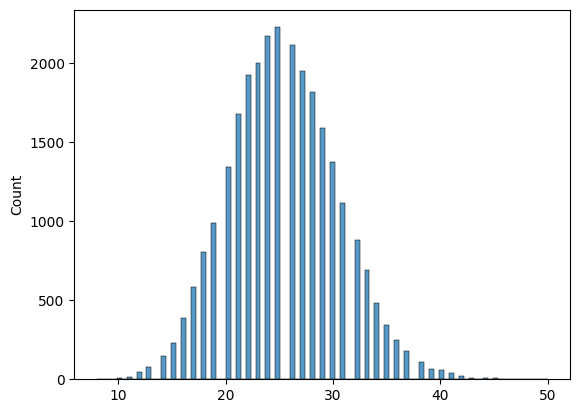

In [9]:
# erdos_renyi_graph(n, p, seed=None, directed=False)
# n : The number of nodes.
# p :Probability for edge creation.
n = 27770
avg_deg = 25.374
p = avg_deg/(n-1)
G3 =nx.erdos_renyi_graph(n, p, seed=1984)
analysis_graph(G3)


Hamsterster friendships

Value	Name
1858	# Nodes
12534	# Edges
13.49	Average degree
0.007	Density
14	    Diameter
0.14	Average Clustering coefficient
0.09	Transitivity
3.45	Average shortest path length
-0.08	Assortativity (Degree Correlation)
0.14	Degree Centralization
0.08	Betweenness Centralization
0.29	Closeness Centralization
0.008	PageRank Centralization


In [ ]:
Watts_Strogatz graph

num_edges =  13006
num_nodes =  1858
average_degree =  14.0
density =  0.007539041464728056
diameter =  5
average_shortest_path_length = 3.4643460609001058
avg_clustering =  0.2455051448872739
transivity =  0.23861500985964507
assortativity =  -0.025222695467959275

 centralization metrics 
----------------------------
degree_centralization =  0.004851749206172358
betweenness_centralization =  0.0029923468818803724
closeness_centralization =  0.04701723342978336
pagerank_centralization =  0.00028661434070384554


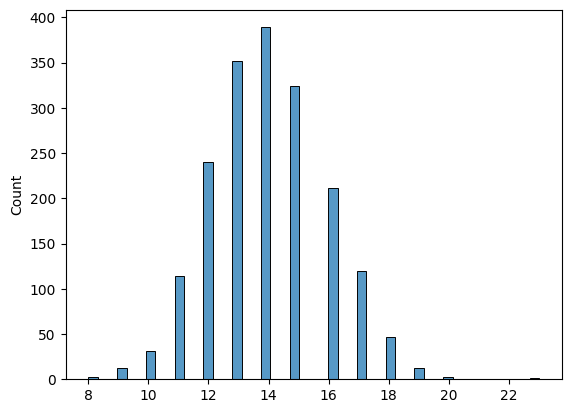

In [10]:
# watts_strogatz_graph(n, k, p, seed=None)
# n : The number of nodes
# k :Each node is connected to k nearest neighbors in ring topology
# p : The probability of rewiring each edge
n = 1858
average_deg = 13.49
k = math.ceil(average_deg)
# fine-tuning the graph with p between 0.1 and 0.40 , we realized that the best fitting p is 0.3
p =  0.3
G1 = nx.watts_strogatz_graph(n, k, p, seed=1984)
analysis_graph(G1)

Barabasi_Albert graph

num_edges =  12957
num_nodes =  1858
average_degree =  13.947255113024758
density =  0.00751063818687386
diameter =  5
average_shortest_path_length = 2.9036520239074446
avg_clustering =  0.032007744740813734
transivity =  0.02578630606129284
assortativity =  -0.03765736361227935

 centralization metrics 
----------------------------
degree_centralization =  0.09328983529236999
betweenness_centralization =  0.06430506340394855
closeness_centralization =  0.2987163020102329
pagerank_centralization =  0.005644279784289204


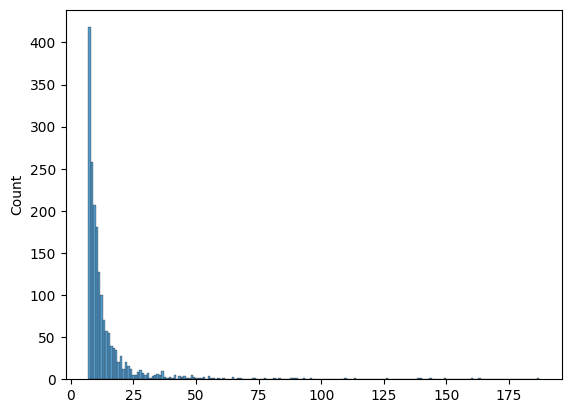

In [11]:
# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
# n : Number of nodes
# m : Number of edges to attach from a new node to existing nodes
n = 1858
average_deg = 13.49
m = math.ceil(average_deg/2)
G2 = nx.barabasi_albert_graph(n, m, seed=1984)
analysis_graph(G2)

powerlaw_cluster_graph

num_edges =  12926
num_nodes =  1858
average_degree =  13.91388589881593
density =  0.007492668766190593
diameter =  4
average_shortest_path_length = 2.8095079103128824
avg_clustering =  0.14004242418352106
transivity =  0.05008201492142442
assortativity =  -0.10734768419996489

 centralization metrics 
----------------------------
degree_centralization =  0.1612323129630661
betweenness_centralization =  0.12031687626474767
closeness_centralization =  0.3560335345199241
pagerank_centralization =  0.009943354850655891


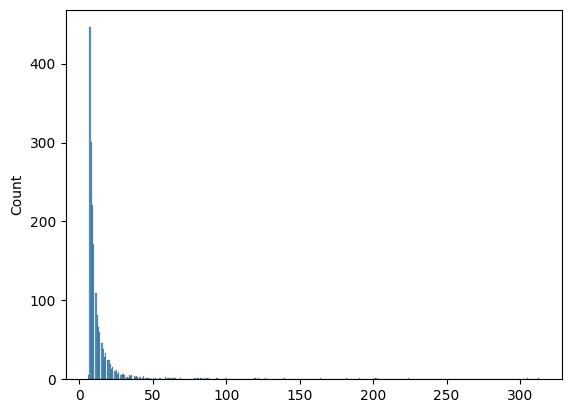

In [12]:
# powerlaw_cluster_graph(n, m, p, seed=None)
# n : the number of nodes
# m : the number of random edges to add for each new node
# p : Probability of adding a triangle after adding a random edge
n = 1858
average_deg = 13.49
m = math.ceil(average_deg/2)
# we realized that the best fitting p is 0.4
p = 0.40
G= nx.powerlaw_cluster_graph(n, m, p, seed=1984)
analysis_graph(G)